In [72]:

import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import json
from math import sin, cos
from glob import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from torchvision.transforms.autoaugment import AutoAugmentPolicy
import pickle
from skimage.transform import rotate
from skimage.transform import rescale, resize, downscale_local_mean

import cv2
from PIL import Image

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [73]:
device='cuda:2'

## Датасет


In [154]:
from math import sin, cos


img_dir = "data\\train_ext\\img\\*.png"
json_dir = "data\\train_ext\\json\\"

In [155]:
data_df = pd.DataFrame({'id': [], "left_top_x": [], 'left_top_y': [], "right_bottom_x": [], 'right_bottom_y': [], 'angle': []})

In [156]:
json_true = []
for path in sorted(glob(img_dir)):
        x = path.split('\\')[-1].split('.')[-2]
        x = str(int(x))+'.json'
        data = json.load(open(json_dir + x))
        s = 724
        new_row = {'id':x.split(".")[0]+".png", 'left_top_x':data["left_top"][0], 'left_top_y':data["left_top"][1], 'right_bottom_x': data["right_bottom"][0], "right_bottom_y": data["right_bottom"][1], 'angle': data["angle"]}
        data_df = data_df.append(new_row, ignore_index=True)

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

In [158]:
data_df.shape

(1660, 6)

In [203]:
class ImageDatasetTrig(Dataset):
    def __init__(self, data_df, transform=None, device='cuda:0', scale=2):
        self.data_df = data_df
        self.scale = scale
        self.device = device
        self.transform = transform
    def __getitem__(self, idx):
        image_name, labels, true_ang = self.data_df.iloc[idx]['id'], \
                                        [self.data_df.iloc[idx]['left_top_x']/10496, 
                                         self.data_df.iloc[idx]['left_top_y']/10496, 
                                         self.data_df.iloc[idx]['right_bottom_x']/10496, 
                                         self.data_df.iloc[idx]['right_bottom_y']/10496, 
                                         np.sin(self.data_df.iloc[idx]['angle']/180*np.pi)],\
                                        self.data_df.iloc[idx]['angle']

        ind = int(image_name.split('.')[-2])
        
        image = cv2.imread(f"data\\train_ext\\img\\{image_name}")
        #print(f"data\\train_ext\\img\\{image_name}")
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (image.shape[0]//self.scale, image.shape[1]//self.scale), cv2.INTER_CUBIC)
        orig_img = image
        image = Image.fromarray(image)
        if self.transform:
            image = self.transform(image)
        
        return orig_img, image.float().to(self.device), torch.tensor(labels).float().to(self.device), true_ang
    
    def __len__(self):
        return len(self.data_df)

In [248]:

train_transform = transforms.Compose([
    #transforms.RandomResizedCrop(224),
    #transforms.Resize(256),
    transforms.AutoAugment(policy=AutoAugmentPolicy.IMAGENET),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

valid_transform = transforms.Compose([
    #transforms.RandomResizedCrop(224),
    #transforms.Resize(256),
    #transforms.AutoAugment(policy=AutoAugmentPolicy.IMAGENET),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

In [249]:
#data_df = pd.read_csv("data/train.csv")

In [250]:
scale = 4

In [251]:
orig = cv2.imread('data/new_orig_02_4.png')
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

In [252]:
from os import listdir

print("Обучающей выборки " ,len(listdir("data\\train_ext\\img")))
print("Тестовой выборки " ,len(listdir("data\\test\\img")))

Обучающей выборки  1660
Тестовой выборки  400


In [281]:
# разделим датасет на трейн и валидацию, чтобы смотреть на качество
train_df, valid_df = train_test_split(data_df, test_size=0.01, random_state=43)

In [282]:
train_df.shape, valid_df.shape

((1643, 6), (17, 6))

In [283]:
train_dataset = ImageDatasetTrig(train_df, transform=train_transform, device=device, scale=scale)
valid_dataset = ImageDatasetTrig(valid_df, transform=valid_transform, device=device, scale=scale)

In [284]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=16,
                                           shuffle=True,
                                           #pin_memory=True,
                                           num_workers=0)

valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
                                           batch_size=16,
                                           # shuffle=True,
                                          # pin_memory=True,
                                           num_workers=0)

## Вспомогательные функции

In [285]:
def metric(data_true, data_pred, angle_true, angle_pred, outImageW = 10496, outImageH = 10496):
    x_center_true = np.array((data_true[0] + data_true[2])/2).astype(int)
    y_center_true = np.array((data_true[1] + data_true[3])/2).astype(int)

    x_metr = x_center_true - np.array((data_pred[0] + data_pred[2])/2).astype(int)
    y_metr = y_center_true - np.array((data_pred[1] + data_pred[3])/2).astype(int)

    metr =  1 - 0.7 * (abs(x_metr)/outImageH + abs(y_metr)/outImageW)/2 - 0.3 *min((abs(angle_true - angle_true),abs(abs(angle_true - angle_true)-360)))/360
    return metr

In [286]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, val_history, marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

In [287]:
float(torch.asin(torch.tensor(1.)))

1.5707963705062866

In [288]:
def train(res_model, criterion, optimizer, train_dataloader, test_dataloader, NUM_EPOCH=15):
    train_loss_log = []
    val_loss_log = []
    
    train_acc_log = []
    val_acc_log = []
    
    for epoch in tqdm(range(NUM_EPOCH)):
        model.train()
        train_loss = 0.
        train_size = 0
        
        train_pred = []

        for orig_img, imgs, labels, true_angles in train_dataloader:
            optimizer.zero_grad()

            imgs = imgs
            labels = labels

            y_pred = model(imgs)

            loss = criterion(y_pred, labels)
            loss.backward()
            
            train_loss += loss.item()
            train_size += y_pred.size(0)
            train_loss_log.append((loss.data.cpu().detach().numpy() / y_pred.size(0)) * 100)
            y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)
            y_pred[:, :4] = y_pred[:, :4] * 10496
            #y_pred[:, -1] = y_pred[:, -1] #* 360 + 180
            angles = torch.asin(y_pred[:, -1])/np.pi*180

            real_angles = []
            for i, angle in enumerate(angles):
                cx = np.clip(int((y_pred_1[i, 0]+y_pred_1[i, 2])/2), 1024//scale+1, 10496//scale - 1024//scale)
                cy = np.clip(int((y_pred_1[i, 1]+y_pred_1[i, 3])/2), 1024//scale+1, 10496//scale - 1024//scale)
                real_ang = real_angle(float(angle), 
                                      cx,
                                      cy,
                                      orig_img,
                                      scale)
                real_angles.append(real_ang)
            labels[:, :4] = labels[:, :4] * 10496
            #labels[:, -1] = labels[:, -1] #* 360 + 180

            for label, pr, ang_true, ang_pred in zip(labels, y_pred, true_angles, real_angles):
                    #print(label, pr)
                    metr = metric(label.cpu().detach().numpy(), pr.cpu().detach().numpy(), ang_true, ang_pred)
                    #print(metr)
                    train_pred.append(metr)

            optimizer.step()

        train_acc_log.append(train_pred)

        val_loss = 0.
        val_size = 0
        
        val_pred = []
        
        model.eval()
        
        with torch.no_grad():
            for orig_img, imgs, labels, true_angles in test_dataloader:
                
                imgs = imgs.cuda(device)
                labels = labels.cuda(device)
                
                y_pred = model(imgs)
                loss = criterion(y_pred, labels)
                
                val_size += y_pred.size(0)
                val_loss += loss.item()
                
                y_pred_1 =  torch.clip(y_pred[:, :-1] * 10496//scale, 1, 10496//scale)
                y_pred[:, :-1]= y_pred[:, :-1] * 10496
                #y_pred[:, -1] = y_pred[:, -1] #* 360 + 180
                angles = torch.asin(y_pred[:, -1])/np.pi*180
                print('angles true', true_angles)
                
                real_angles = []
                for i, angle in enumerate(angles):
                    cx = np.clip(int((y_pred_1[i, 0]+y_pred_1[i, 2])/2), 1024//scale+1, 10496//scale - 1024//scale)
                    cy = np.clip(int((y_pred_1[i, 1]+y_pred_1[i, 3])/2), 1024//scale+1, 10496//scale - 1024//scale)
                    real_ang = real_angle(float(angle), 
                                          cx,
                                          cy,
                                          orig_img,
                                          scale)
                    real_angles.append(real_ang)

                print('angles pred', real_angles)
                labels[:, :-1] = labels[:, :-1] * 10496
                #labels[:, -1] = labels[:, -1] #* 360 + 180

                for label, pr, ang_true, ang_pred in zip(labels, y_pred, true_angles, real_angles):
                    #print(label, pr)
                    metr = metric(label.cpu().detach().numpy(), pr.cpu().detach().numpy(), ang_true, ang_pred)
                    #print(metr)
                    val_pred.append(metr)
                print('true labels', y_pred)
                print('pred labels', labels)
        val_loss_log.append((val_loss/ val_size)*100)
        val_acc_log.append(val_pred)

        #clear_output()
        plot_history(train_loss_log, val_loss_log, 'loss')
        


        print('Train loss:', (train_loss / train_size)*100)
        print('Val loss:', (val_loss / val_size)*100)
        print('Train metric:', (np.mean(train_pred)))
        print('Val metric:', (np.mean(val_pred)))
        
    return train_loss_log, train_acc_log, val_loss_log, val_acc_log

In [289]:
def real_angle(angle, cy, cx, patch, scale):
    #print(cx, cy)
    pad = 1024//scale//2
    patch = orig[cy-pad:cy+pad,cx-pad:cx+pad]
    patch_rot = rotate(patch, angle)
    patch_rot180 = rotate(patch, angle+180)
#         print(c_y_c_x)
#         print(patch_big.shape)
    corr1 = ((patch - patch_rot)**2).sum()
    corr2 = ((patch - patch_rot180)**2).sum()
    if corr1 < corr2:
        return angle
    else:
        return angle + 180

## Модель

In [290]:
class Resnet50(nn.Module):
    def __init__(self):
        super(Resnet50, self).__init__()
        self.resnet = models.wide_resnet50_2(pretrained=True)
        self.spat_lin = nn.Linear(1000, 5)
        #self.angle_lin = nn.Linear(1000, 1)
        
    def forward(self, x):
        x = self.resnet(x)
        x = F.relu(x)
        x = self.spat_lin(x)
        #out_angle = self.angle_lin(out_lin_1)
        x[:, 4] = F.tanh(x[:, 4])
        x[:, :4] = F.relu(x[:, :4])
        return x
        

In [291]:
torch.cuda.empty_cache()

In [292]:
device

'cuda:2'

In [293]:
torch.cuda.empty_cache()

model = Resnet50()
model = model.to(device)

E:\uhin\dev\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
E:\uhin\dev\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [266]:
# model = Resnet50()
# model.load_state_dict(torch.load('models/wideresnet_trig_ext_relu.pt'))
# model = model.to(device)

In [294]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2103541605.py:29: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2103541605.py:76: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='tr

angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [-16.9843692779541, 19.082170486450195, 14.401422500610352, -4.385768890380859, 15.535778045654297, 216.1190185546875, 28.077922821044922, -18.654634475708008, 148.51547241210938, 220.13253021240234, 7.296610355377197, 27.338890075683594, 53.510826110839844, -22.78268814086914, 29.341684341430664, 9.9749116897583]
true labels tensor([[ 1.5609e+04,  9.7773e+03,  6.4495e+03,  3.0749e+03, -2.9211e-01],
        [ 4.3760e+03,  5.1600e+03,  9.1533e+03,  6.0807e+03,  3.2692e-01],
        [ 2.7044e+03,  3.5099e+03,  5.2109e+03,  6.0586e+03,  2.4871e-01],
        [ 9.6716e+03,  7.6443e+03,  7.9261e+03,  8.3978e+03, -7.6471e-02],
        [ 3.1643e+03,  7.6760e+03,  5.2684e+03,  8.5263e+03,  2.6784e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  5.8946e-01],
        [ 2.2639e+02,  0.0000e+00,  2.9804e+03,  5.6592e+03,  4.

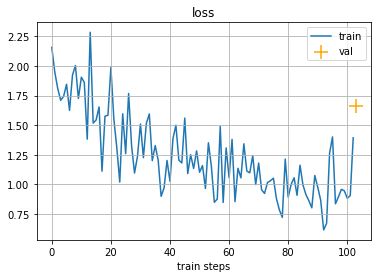

 10%|████████                                                                        | 1/10 [13:23<2:00:27, 803.08s/it]

Train loss: 1.2498187278728983
Val loss: 1.663450852913015
Train metric: 0.856347973734654
Val metric: 0.8842519839490675
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [6.199897766113281, 62.87018585205078, 26.657697677612305, 7.163106918334961, 9.094675064086914, 39.49851989746094, 28.425168991088867, -2.578009605407715, 11.075732231140137, -12.636164665222168, 8.826693534851074, 23.90300750732422, 25.527477264404297, 7.314548492431641, -12.299208641052246, 39.64381408691406]
true labels tensor([[ 1.1562e+04,  4.1332e+03,  1.1159e+04,  6.3353e+03,  1.0800e-01],
        [ 4.1657e+03,  4.4198e+03,  9.0593e+03,  6.9119e+03,  8.8998e-01],
        [ 7.2848e+03,  3.5854e+03,  6.8331e+03,  2.1245e+03,  4.4866e-01],
        [ 1.0092e+04,  7.9023e+03,  1.0068e+04,  3.7014e+03,  1.2469e-01],
        [ 2.9458e+03,  9.8550e+03,  3.3688e+03,  7.5532e+03,  1.5807e-01],
        [ 1.1797e+0

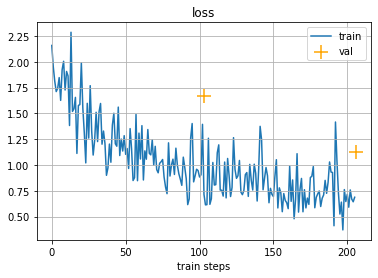

 20%|████████████████                                                                | 2/10 [27:29<1:50:26, 828.31s/it]

Train loss: 0.7990726333834816
Val loss: 1.121749312562101
Train metric: 0.8950641023262028
Val metric: 0.9241769973995696
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [-28.969173431396484, 40.207576751708984, -20.746761322021484, -60.025054931640625, 147.40332412719727, 53.4861946105957, 24.499238967895508, -22.996803283691406, -60.99709701538086, 159.83689880371094, -31.28137969970703, -37.14278030395508, -15.113390922546387, -25.989503860473633, -51.86373519897461, -4.831576347351074]
true labels tensor([[ 1.2863e+04,  7.1070e+03,  9.9204e+03,  4.6747e+03, -4.8434e-01],
        [ 5.8558e+03,  9.1053e+03,  9.7335e+03,  5.3839e+03,  6.4556e-01],
        [ 8.8183e+03,  4.2091e+03,  9.6677e+03,  7.7925e+02, -3.5424e-01],
        [ 7.4167e+03,  6.3179e+03,  1.0157e+04,  4.1905e+03, -8.6624e-01],
        [ 4.6521e+03,  8.0879e+03,  5.1903e+03,  7.7803e+03, -5.3872e-01],
       

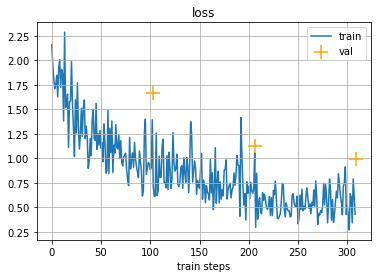

 30%|████████████████████████                                                        | 3/10 [41:18<1:36:40, 828.67s/it]

Train loss: 0.5506890802686707
Val loss: 0.9885631282539928
Train metric: 0.9118107132717516
Val metric: 0.905601293489957
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [68.45256805419922, 235.94519424438477, -44.17755889892578, -31.437576293945312, -19.380191802978516, 41.99793243408203, 16.98594093322754, -23.68202781677246, 120.31961059570312, -17.82570457458496, -22.48695945739746, 5.76914644241333, -31.517141342163086, -14.177200317382812, -11.717473030090332, 51.21072006225586]
true labels tensor([[ 8.2618e+03,  5.2167e+03,  1.0297e+04,  5.8002e+03,  9.3011e-01],
        [ 4.8192e+03,  8.4092e+03,  1.0328e+04,  7.3806e+03,  8.2850e-01],
        [ 6.4582e+03,  5.1805e+03,  6.5664e+03,  3.1161e+03, -6.9688e-01],
        [ 6.5456e+03,  5.7099e+03,  6.1638e+03,  4.9797e+03, -5.2157e-01],
        [ 3.9772e+03,  1.1686e+04,  4.0588e+03,  7.7301e+03, -3.3184e-01],
        [ 1.

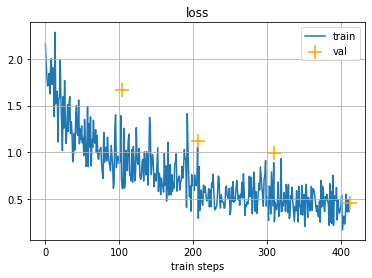

 40%|████████████████████████████████                                                | 4/10 [54:25<1:21:13, 812.26s/it]

Train loss: 0.4537828570448329
Val loss: 0.4540285369490876
Train metric: 0.9174016441239997
Val metric: 0.9381784097022956
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [29.5929012298584, 85.18354034423828, -58.47929763793945, -31.131614685058594, -43.244956970214844, 55.39309310913086, 30.118207931518555, -16.82816505432129, -61.80637741088867, 9.268927574157715, 13.490960121154785, -20.8905086517334, 28.220237731933594, -3.046534538269043, 20.97391128540039, 63.66316604614258]
true labels tensor([[ 6.1336e+03,  6.4179e+03,  5.9365e+03,  5.0696e+03,  4.9383e-01],
        [ 3.9473e+03,  8.0142e+03,  7.2953e+03,  8.2750e+03,  9.9647e-01],
        [ 6.1123e+03,  5.4258e+03,  6.4831e+03,  2.8874e+03, -8.5245e-01],
        [ 6.9564e+03,  4.8820e+03,  7.0241e+03,  4.5632e+03, -5.1701e-01],
        [ 5.5010e+03,  9.0613e+03,  4.4225e+03,  6.0902e+03, -6.8512e-01],
        [ 9.6239

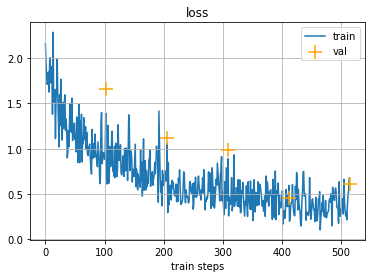

 50%|███████████████████████████████████████                                       | 5/10 [1:07:14<1:06:24, 796.86s/it]

Train loss: 0.3846434970418636
Val loss: 0.6142689462970286
Train metric: 0.9251371330747219
Val metric: 0.9315229331061693
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [42.27300262451172, 77.25650024414062, 107.48900604248047, -12.314301490783691, -24.699674606323242, 70.84021759033203, 21.02398109436035, -29.656736373901367, -48.01289749145508, 15.477313995361328, -5.8875298500061035, 18.274860382080078, -38.210994720458984, 22.959304809570312, 10.637228965759277, 225.9990119934082]
true labels tensor([[ 9.6672e+03,  5.9716e+03,  1.0393e+04,  6.7638e+03,  6.7266e-01],
        [ 6.3858e+03,  4.9133e+03,  1.0288e+04,  5.4060e+03,  9.7537e-01],
        [ 7.2854e+03,  4.7187e+03,  8.2016e+03,  4.3409e+03, -9.5377e-01],
        [ 6.8112e+03,  5.4437e+03,  7.7382e+03,  5.5428e+03, -2.1327e-01],
        [ 6.1930e+03,  7.1340e+03,  6.8058e+03,  6.4811e+03, -4.1786e-01],
        [ 

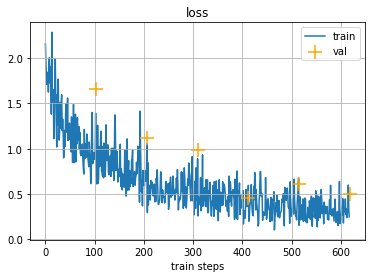

 60%|████████████████████████████████████████████████                                | 6/10 [1:21:06<53:55, 808.77s/it]

Train loss: 0.313302052189719
Val loss: 0.5018433775095379
Train metric: 0.9293542396929695
Val metric: 0.92606987535868
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [-14.769136428833008, 264.6383743286133, -39.791961669921875, -47.90668869018555, 20.874408721923828, 71.5911636352539, 19.915483474731445, -16.23141098022461, -38.75041961669922, 0.4908197224140167, 16.11928367614746, -3.5348339080810547, 215.8826446533203, 42.57708740234375, 232.90056991577148, 35.57207107543945]
true labels tensor([[ 6.8474e+03,  4.7213e+03,  7.7653e+03,  4.0914e+03, -2.5492e-01],
        [ 6.2495e+03,  6.3503e+03,  8.5555e+03,  7.1439e+03,  9.9562e-01],
        [ 7.1167e+03,  1.3056e+03,  7.4940e+03,  2.2394e+03, -6.4000e-01],
        [ 6.9332e+03,  6.8963e+03,  7.1529e+03,  5.3765e+03, -7.4205e-01],
        [ 4.6540e+03,  8.5306e+03,  4.4924e+03,  7.7218e+03,  3.5632e-01],
        [ 2.8329e

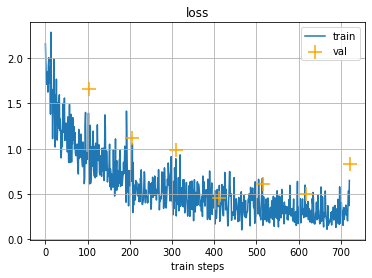

 70%|████████████████████████████████████████████████████████                        | 7/10 [1:35:52<41:41, 833.80s/it]

Train loss: 0.2928489061867182
Val loss: 0.8371564367895616
Train metric: 0.9301702738335584
Val metric: 0.9420426268830703


 70%|████████████████████████████████████████████████████████                        | 7/10 [1:38:29<42:12, 844.19s/it]


KeyboardInterrupt: 

In [295]:
train_loss_log, train_acc_log, val_loss_log, val_acc_log = train(model, 
                                                                 criterion, 
                                                                 optimizer, 
                                                                 train_loader, 
                                                                 valid_loader, 
                                                                 10)

In [296]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2103541605.py:29: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2103541605.py:76: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='tr

angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [29.332237243652344, 78.68659973144531, -57.22545623779297, -26.459489822387695, -57.869537353515625, 253.31358337402344, 21.785009384155273, -31.24854278564453, 122.82311248779297, 21.407405853271484, 139.29964447021484, -22.253854751586914, -27.667232513427734, 12.809536933898926, 32.70521545410156, 35.33913803100586]
true labels tensor([[ 8.2636e+03,  4.7658e+03,  8.5146e+03,  4.4770e+03,  4.8987e-01],
        [ 7.0502e+03,  6.8212e+03,  9.4804e+03,  6.6702e+03,  9.8057e-01],
        [ 6.5364e+03,  3.2155e+03,  7.2205e+03,  2.0640e+03, -8.4081e-01],
        [ 7.0603e+03,  5.3543e+03,  7.7090e+03,  5.1964e+03, -4.4556e-01],
        [ 3.8891e+03,  8.5673e+03,  4.2363e+03,  7.6071e+03, -8.4684e-01],
        [ 2.2161e+03,  4.2158e+03,  4.3595e+03,  3.7719e+03,  9.5789e-01],
        [ 5.1730e+03,  2.3027e+03,  5.4261e+03,  2.8898e+0

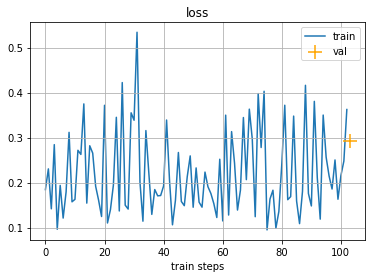

 10%|████████                                                                        | 1/10 [15:26<2:18:57, 926.39s/it]

Train loss: 0.22028362195954695
Val loss: 0.29201430597287764
Train metric: 0.9413927880707881
Val metric: 0.9488824874461981
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [24.93947982788086, 75.83968353271484, -54.303043365478516, -30.891185760498047, -48.77667236328125, 64.84064483642578, 18.196165084838867, -28.47199249267578, -49.92270278930664, 15.284219741821289, -32.33975601196289, -12.96226978302002, -25.455320358276367, 21.233619689941406, 21.26415252685547, 34.363956451416016]
true labels tensor([[ 7.9247e+03,  5.4202e+03,  8.5137e+03,  4.4833e+03,  4.2166e-01],
        [ 7.2709e+03,  7.5098e+03,  8.7623e+03,  7.0423e+03,  9.6962e-01],
        [ 6.5389e+03,  2.8439e+03,  7.0891e+03,  2.1530e+03, -8.1211e-01],
        [ 7.0908e+03,  5.5679e+03,  7.9785e+03,  5.4040e+03, -5.1341e-01],
        [ 4.2335e+03,  8.3064e+03,  4.1118e+03,  7.6067e+03, -7.5215e-01],
        [

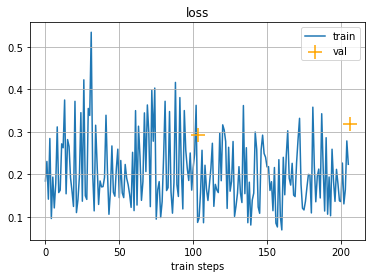

 20%|████████████████                                                                | 2/10 [28:58<1:54:34, 859.28s/it]

Train loss: 0.18910782114668945
Val loss: 0.31790266306523013
Train metric: 0.9440055910932188
Val metric: 0.9498475609756099


 20%|███████████████▊                                                               | 2/10 [37:00<2:28:03, 1110.50s/it]


KeyboardInterrupt: 

In [297]:
train_loss_log, train_acc_log, val_loss_log, val_acc_log = train(model, 
                                                                 criterion, 
                                                                 optimizer, 
                                                                 train_loader, 
                                                                 valid_loader, 
                                                                 10)

In [298]:
torch.save(model.state_dict(), 'models/wideresnet_trig_ext_relu_3.pt')

In [270]:
class TestImageDatasetTrig(Dataset):
    def __init__(self, files, transform=None, device='cuda:0', scale=2):
        self.files = files
        self.scale = scale
        self.device = device
        self.transform = transform
    def __getitem__(self, idx):
        image_name = self.files[idx]
        image = cv2.imread(image_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (image.shape[0]//self.scale, image.shape[1]//self.scale), cv2.INTER_CUBIC)
        orig_img = image
        image = Image.fromarray(image)
        if self.transform:
            image = self.transform(image)
        return orig_img, image.float().to(self.device)
    def __len__(self):
        return len(self.files)

In [299]:
test_files = sorted(glob('data\\test\\img_uncloud\\*'))

In [300]:
test_dataset = TestImageDatasetTrig(test_files, valid_transform, device, scale)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=16,
                                           # shuffle=True,
                                           #pin_memory=True,
                                           num_workers=0
                                           )

In [301]:
indexes = [x.split('\\')[-1].split('.')[0] for x in test_files]
preds = []

for orig_img, imgs in test_loader:
    imgs = imgs.cuda(device)         
    y_pred = model(imgs)
    y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)
    y_pred[:, :4] = y_pred[:, :4] * 10496
    #y_pred[:, -1] = y_pred[:, -1] #* 360 + 180
    angles = torch.asin(y_pred[:, -1])/np.pi*180

    real_angles = []
    for i, angle in enumerate(angles):
        cx = np.clip(int((y_pred_1[i, 0]+y_pred_1[i, 2])/2), 1024//scale+1, 10496//scale - 1024//scale)
        cy = np.clip(int((y_pred_1[i, 1]+y_pred_1[i, 3])/2), 1024//scale+1, 10496//scale - 1024//scale)
        real_ang = real_angle(float(angle), cx, cy, orig_img, scale)
        real_angles.append(real_ang)
    clipped_pred = y_pred.cpu().detach()
    for i, pred in enumerate(y_pred.cpu().detach()):
        clipped_pred[i, :4] = torch.clip(pred[:4], 1, 10496)
        cx = (clipped_pred[i, 0]+clipped_pred[i, 2])/2
        cy = (clipped_pred[i, 1]+clipped_pred[i, 3])/2
        if cx < 512:
            clipped_pred[i,0] += 512 - cx 
            clipped_pred[i, 2] += 512 - cx 
        if cy < 512:
            clipped_pred[i, 1] += 512 - cy 
            clipped_pred[i, 3] += 512 - cy
        if cx > 10496-512-1:
            clipped_pred[i, 0] -= cx - (10496-512-1)
            clipped_pred[i, 2] -= cx - (10496-512-1)
        if cy > 10496-512-1:
            clipped_pred[i, 1] -= cy - (10496-512-1) 
            clipped_pred[i, 3] -= cy - (10496-512-1)
        clipped_pred[i, 4] = real_angles[i]
    torch.cuda.empty_cache()
    del y_pred_1
    
    preds.extend(list(clipped_pred))
    print(preds[-1])
    del clipped_pred

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35280\2983123453.py:7: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)


tensor([4289.3271, 5480.1807, 4629.3467, 4827.1260,   33.4954])
tensor([4825.1582, 6966.1357, 4318.7847, 6141.0044,  -13.1508])
tensor([5314.3174, 6495.1650, 6952.2866, 7019.2852,  -23.2271])
tensor([1957.2061, 1994.6927, 4000.2676, 2115.2500,   14.0744])
tensor([1112.3540, 8551.2656, 1963.6403, 8590.4883,   16.7298])
tensor([4231.9604, 5568.1787, 5705.6646, 5324.3003,   44.8965])
tensor([7117.2456, 2252.1978, 8060.1929, 2107.9443,  -19.4123])
tensor([5396.8257, 6287.6816, 6544.3096, 5307.7598,  -30.6010])
tensor([5912.6992, 3671.6479, 6187.5293, 4940.4014,   22.4386])
tensor([5194.2305, 7611.1006, 4998.7598, 8588.2236,  -26.5259])
tensor([2797.3127, 2613.3765, 5429.1260, 1906.4338,  -48.2281])
tensor([8341.3389, 2702.8594, 9087.2158, 2359.2957,  -23.0017])
tensor([4418.4443, 3211.2944, 4881.8145, 3131.2485,  -29.0889])
tensor([3779.0061, 1973.9458, 4519.8818, 2997.2756,   57.9634])
tensor([5320.6245, 5450.8921, 6657.6084, 3828.3328,   39.9879])
tensor([5014.7881, 7250.1172, 5431.5454,

In [302]:
with open('submissions/wideresnet_trig_ext_relu_04.pickle', 'wb') as f:
    pickle.dump(preds, f)

In [303]:
sub_dir = "submissions\\subm_wideresnet_trig_ext_relu_04\\"
if not os.path.exists(sub_dir):
    os.makedirs(sub_dir)

json_true = []

for indx, pred in zip(indexes, preds):

    pred = [int(x) for x in pred]
    pred[4] = pred[4]%360
    left_top = [pred[0], pred[1]]
    right_top = [pred[2], pred[1]]
    left_bottom = [pred[0], pred[3]]
    right_bottom = [pred[2], pred[3]]
        
    res = {
        'left_top': left_top,
        'right_top': right_top,
        'left_bottom': left_bottom,
        'right_bottom': right_bottom,
        'angle': pred[4]
    }

    with open(sub_dir+indx+'.json', 'w') as f:
        json.dump(res, f)

## Посчитаем метрику